## Midterm 1 

This exam has three questions. The first problem has several True/False questions, covering various concepts we've covered so far. The next two problems ask you to implement different models on some small data sets, and to answer questions about the results.

You can use any online resource: This intended to allow to you access documentation and examples for coding as you would when you program in practice. *You are expressly forbidden to have any communication with another person--either inside or outside of the class--during the exam.*

If you get stuck on a coding part, please include comments or markdown describing how you would go about getting a working solution. We will take this into account to assign partial credit.

You have 1 hour and 15 minutes to complete the exam. When you are finished, upload to Canvas your notebook and pdf (from html) printout, just as you do for the assignments. 



### Problem 1: True/False (15 points)

Indicate your answer for each question by replacing [TF] with [T] for True and replacing [TF] with [F] for False.

#### 1.1 Classification and regression

Consider a classification task where the input is $d$-dimensional and the output $Y$ is binary

1. A method is overfitting the data when it has a small training MSE but a large test MSE. [T]

1. Logistic regression is more accurate than linear discriminant analysis because logistic regression does not give a linear decision boundary. [F]

1. Leave-one-out cross validation gives a more accurate estimate of test error than $R^2$. [T]

1. $K$-nearest neighbors regression will always give a better fit than linear regression [F]

1. If $X$ is an $n\times p$ data matrix, where each column mean is zero, then $\frac{1}{n} X^T X$ is the sample covariance matrix. [T]


#### 1.2 Trees and random forests

Consider growing random forests for regression. We can vary the depth (or “height”) $h$ of the tree or the number of random predictors $m$ chosen for each split.

6. Each bootstrap sample of a data set contains about 63% of the original data. [T]

6. When we penalize a method, the variance increases. [F]

6. Pruning a decision tree helps to decrease the bias of the model. [F]

6. Random forest regression will give the same result whether or not the data is standardized before fitting. [T]

6. Bootstrap aggregation and random forests are ensemble methods. [T]


#### 1.3 PCA and gradient descent


11. Stochastic gradient descent optimizes a loss function using random samples of the data at each step to optimize a model's parameters. [T]

11. Stochastic gradient descent is designed to maximize the probability a logistic regression model assigns to the labels in the training data. [T]

11. Applying gradient descent to the loss function for logistic regression should give approximately the same answer for any initialization of the parameters. [T]

11. PCA finds directions of greatest variation in the data. [T]

11. The first and second principal vectors from PCA are always orthogonal to each other. [T]




### Problem 2: Logistic regression (20 points)

<img src="./mushrooms.jpg" width="125" align="left" style="margin:10px 20px">

Have you every gone for a walk in the woods and been tempted to bring back some mushrooms for your dinner salad? Well, even if not, it makes sense to ask how many mushrooms we would need to see in order to accurately classify a mushroom as edible or poisonous. You'll get an answer  in this problem.

We'll first load a database of mushrooms that have been hand-classified according to whether or not they are poisonous. Then, we'll put it into a form suitable for logistic regression by converting all of the categorical variables to "dummy" variables using a "1-hot" representation. Then you'll fit logistic regression models on training sets of increasing size.


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('mushrooms.csv')
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
data['class'] = LabelEncoder().fit_transform(data['class'])
encoded_data = pd.get_dummies(data)
encoded_data.head()

,class,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,1,0,0,0,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0


#### 2.1 Explain the transformation of the data

Explain in words what the transformations above are doing, to prepare the data for classification, and why the original data are not in a suitable form.


[Your answer in markdown here] 3 points

* The transformation is mapping each categorical variable to a series of 1-hot or "dummy" variables

* so the weights are meaningful in a logistic regression model.

* 1 point for free


Next, we convert this DataFrame to numpy arrays, suitable for input to sklearn.

In [4]:
y = encoded_data['class'].values
X = encoded_data.drop('class', 1).values

#### 2.2 Dimensions of the data

Ok, now before you get to work building a classifier, answer a couple of questions about the data. How many data points are there? How many original predictors? How many predictor variables after expansion using dummy variables? What percentage of the mushrooms in the data set are poisonous?

In [5]:
num_data_points = X.shape[0] # your code here
num_original_predictors = data.shape[1]-1 # your code here
num_expanded_predictors = X.shape[1] # your code here
poisonous = np.mean(y)*100 # your code here

# 1 point for each correct answer
print("Number of data points: %d" % num_data_points)
print("Number of original predictors: %d" % num_original_predictors)
print("Number of expanded predictors: %d" % num_expanded_predictors)
print("Percent poisonous: %.1f%%" % poisonous)

Number of data points: 8124
Number of original predictors: 22
Number of expanded predictors: 117
Percent poisonous: 48.2%


#### 2.3 Fitting logistic regression models

Next, you should construct a series of logistic regression models with an increasing number of training points. Specifically:

* let the sample size $n$ vary from 2 to 400 in increments of 1
* for each $n$ train a logistic regression model on $n$ randomly selected training points, and test on the remaining data
* For each $n$, do this 10 times and average the error rates
* Plot the resulting average error rates as a function of $n$

Some important notes and hints:

* Use the function `sklearn.model_selection.train_test_split` in each trial to randomly split the data into training and test sets. For example, you can use `train_test_split(X, y, train_size=n)`
* When $n$ is small, the model will fail to train if all of the training examples have the same label. When this happens, just skip that data set and choose another random split.
* The implementation only requires about 10-15 lines of code. If you find yourself writing a lot more, reconsider your approach!

100%|██████████| 399/399 [00:40<00:00,  8.17it/s]


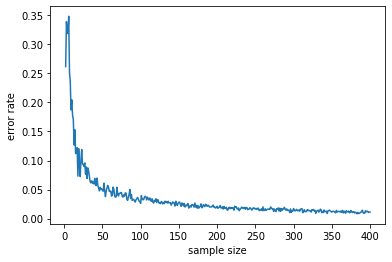

In [6]:
# 10 points

trials = 10
sample_size = np.arange(2, 401, 1)
error_rate = np.zeros(len(sample_size))
lr = LogisticRegression(solver='lbfgs')

from tqdm import tqdm
error_rate = []
lr = LogisticRegression(solver='lbfgs')
for n in tqdm(sample_size):
    err = []
    for trial in np.arange(trials):
        while True:
            X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=n)
            if (sum(y_train) < len(y_train)) and (sum(y_train) > 0):
                break
        _ = lr.fit(X_train, y_train)
        this_err = np.mean(lr.predict(X_test) != y_test)
        err.append(this_err)
    error_rate.append(np.mean(err))

plt.plot(sample_size, error_rate)
plt.xlabel('sample size')
_ = plt.ylabel('error rate')

#### 2.4  Sample sizes to get 5% and 1% error

Finally, answer the following questions about your results. How many data points are required before the error falls below 5 percent? Below 1 percent?


In [7]:
# 2 points, 1 each -- need correct code and/or numbers in the nbhd of 50 and 300

e = np.array(error_rate)

n_05 = np.min(sample_size[np.where(e < 0.05)])
print("%d samples are required before the error falls below 5%%" % n_05)

n_01 = np.min(sample_size[np.where(e < 0.01)])
print("%d samples are required before the error falls below 1%%" % n_01)

46 samples are required before the error falls below 5%
329 samples are required before the error falls below 1%


### Problem 3: PCA and classification (30 points)

<img src="./irises.png" width="500" align="top">

In this problem you will carry out principal components analysis and classification on the iris data. The task will be to reduce the dimension from four to two using PCA, and then to compare decision tree classifiers with logistic regression.



In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
%matplotlib inline

The following cell plots the original data in terms of sepal width and petal length.

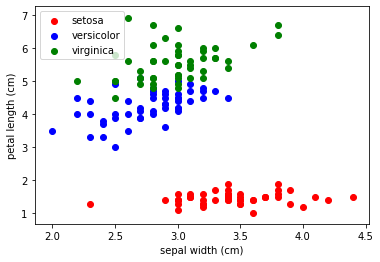

In [9]:
from sklearn.datasets import load_iris

fig = plt.figure()
iris = load_iris()
x_index = 1
y_index = 2
ax = fig.add_subplot(111)
colors = ['red', 'blue', 'green']
for c in np.arange(3):
    mask = (iris.target==c)
    plt.scatter(iris.data[mask, x_index], iris.data[mask, y_index], color=colors[c], label=iris.target_names[c])

plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index])
plt.legend(loc='upper left')
plt.show()

In [10]:
X = iris.data
y = iris.target

#### 3.1 Carry out PCA

In the following cell, reduce the dimension of the data from four to two dimensions by carrying out principal components analysis. Let `pv1` be the first principal vector and let `pv2` be the second principal vector.


In [11]:
# your code here
# 4 points

X = X - np.mean(X,0)
pca = PCA()
pca.fit(X)
pcs = pca.fit_transform(X)


pv1 = pca.components_[0] # your code here
pv2 = pca.components_[1] # your code here
pcs = pca.fit_transform(X)[:,0:2] # your code here

# Comment out the following lines!
#pv1 = np.random.normal(size=4)
#pv2 = np.random.normal(size=4)
#pcs = np.random.normal(size=2*X.shape[0]).reshape(X.shape[0], 2)


The next cell plots the principal vectors

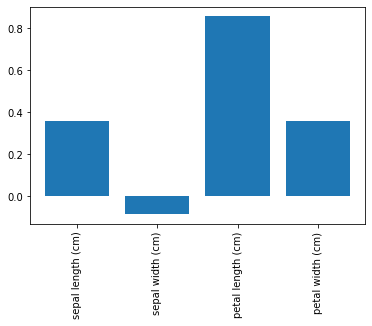

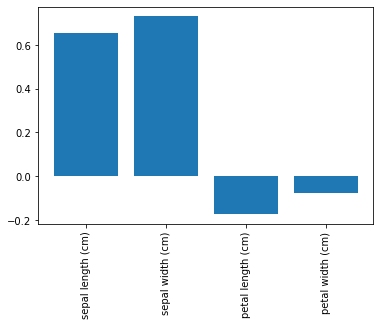

In [12]:
plt.bar(np.arange(4), pv1)
plt.xticks(np.arange(4), iris.feature_names, rotation='vertical')
plt.show()

plt.bar(np.arange(4), pv2)
plt.xticks(np.arange(4), iris.feature_names, rotation='vertical')
plt.show()


#### 3.2 Qualitative description of vectors

Describe qualitatively the main properties of the data that the first two principal vectors are capturing.

[Your answer here in markdown]
2 points

The first principal vector is capturing variation in petal length. The second principal vector is capturing variation in sepal length and width.

#### 3.3 Verify orthogonality

Write a single code that evaluates to `True` if the first two principal vectors are orthogonal, and to `False` otherwise. (You will need to take numerical error into account!)


In [13]:
# Your line here
# 2 points

np.abs(np.dot(pv1, pv2) < 1e-15)

True

Finally, plot the projections of the four countries onto the first two principal components of the data. To do this, use the code provided below, and just swap in the `principal_components` you computed above.

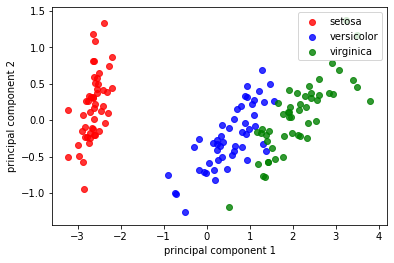

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111)
colors = ['red', 'blue', 'green']
for i in np.arange(3):
    mask = y==i
    ax.scatter(pcs[mask,0], pcs[mask,1], alpha=0.8, c=colors[i], label=iris.target_names[i])
plt.legend(loc='upper right')
plt.xlabel('principal component 1')
plt.ylabel('principal component 2')
plt.show()

#### 3.4 Describe your plot
2 points

Describe the resulting plot. How is it different than and similar to the plot above for petal length vs. sepal width?

#### 3.5 Fitting decision trees

Next, you construct a series of decision tree classifiers **using the first two principal components** as predictor variables, with an increasing number of training points. Specifically:

* let the sample size 10% of the data to 90% of the data, in increments of 10%
* for each sample size, train a decision tree on randomly selected training points, and test on the remaining data
* For each sample size, run 1000 trials and average the error rates
* Plot the resulting average error rates as a function of sample percentage of the data

Some important notes and hints:

* Use the function `sklearn.model_selection.train_test_split` in each trial to randomly split the data into training and test sets. For example, you can use `train_test_split(X, y, train_size=.1)`
* The implementation only requires about 10-15 lines of code. If you find yourself writing a lot more, reconsider your approach!

100%|██████████| 9/9 [00:04<00:00,  2.08it/s]


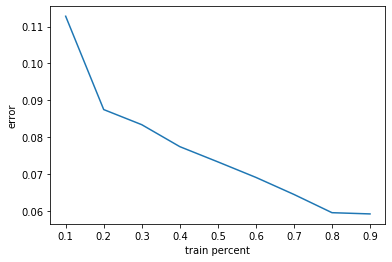

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# 5 points

X = pcs
dtree = DecisionTreeClassifier()
dt_error_rate = []
trials = 1000
train_percent = np.linspace(.1,.9,num=9)

from tqdm import tqdm
for p in tqdm(train_percent):
    errs = []
    for trial in np.arange(trials):
        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=p)
        dtree.fit(X_train, y_train)
        err = np.mean(dtree.predict(X_test) != y_test)
        errs.append(err)
    this_err = np.mean(errs)
    dt_error_rate.append(this_err)
    
plt.plot(train_percent, dt_error_rate)
plt.xlabel('train percent')
_ = plt.ylabel('error')

#### 3.6 Finding the minimum error

What is the smallest average error attained by the decision trees?


In [16]:
# 2 points
min_error = np.min(np.array(dt_error_rate)) # your code here
print("The minimum error attained by the decision trees is %.2f%%" % (100*min_error))

The minimum error attained by the decision trees is 5.91%


#### 3.7 Interpreting the trees

Note that the decision trees are classifying into three types, namely the three species *virginica*, *setosa*, and *versicolor*. Explain in words how the decision tree makes this prediction at each leaf in the tree.


[Your answer here in markdown]

2 points

#### 3.8 Training logistic regression models

Next, construct a series of logistic regression using an increasing number of training points, **also using the first two principal components as predictor variables**.  Specifically:

* let the sample size 10% of the data to 90% of the data, in increments of 10%
* for each sample size, train a logistic regression model on randomly selected training points, and test on the remaining data
* For each sample size, run 1000 trials and average the error rates
* Plot the resulting average error rates as a function of sample percentage of the data

Some important notes and hints:

* As before, use the function sklearn.model_selection.train_test_split in each trial to randomly split the data into training and test sets. For example, you can use train_test_split(X, y, train_size=.1)
* Use `lr = LogisticRegression(solver='lbfgs', multi_class='multinomial')` as written. This will fit a logistic regression model to predict the three class labels (*versicolor*, *virginica*, and *setosa*). This is a linear model of the log-odds, just as for binary logistic regression. The decision boundaries will be linear functions of the two principal components.
* In a little more detail, in a logistic regression model to carry out three-way classification where $Y$ can be 0, 1, or 2, the model takes the form
$$ P(Y=0 \,|\, x) = \frac{1}{1 + e^{\beta_1^T x} + e^{\beta_2^T x}}$$
<br>
$$ P(Y=1 \,|\, x) = \frac{e^{\beta_1^T x}}{1 + e^{\beta_1^T x} + e^{\beta_2^T x}}$$
<br>
$$ P(Y=2 \,|\, x) = \frac{e^{\beta_2^T x}}{1 + e^{\beta_1^T x} + e^{\beta_2^T x}}$$
<br>
* The decision boundaries between any two classes in such a model are linear.


100%|██████████| 9/9 [00:37<00:00,  4.41s/it]


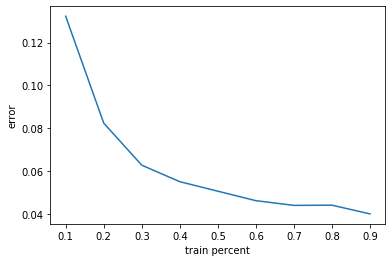

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# 5 points

X = pcs
lr = LogisticRegression(solver='lbfgs', multi_class='multinomial')
lr_error_rate = []
trials = 1000
train_percent = np.linspace(.1,.9,num=9)

# your code here
from tqdm import tqdm
for p in tqdm(train_percent):
    errs = []
    for trial in np.arange(trials):
        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=p)
        lr.fit(X_train, y_train)
        err = np.mean(lr.predict(X_test) != y_test)
        errs.append(err)
    this_err = np.mean(errs)
    lr_error_rate.append(this_err)
    
plt.plot(train_percent, lr_error_rate)
plt.xlabel('train percent')
_ = plt.ylabel('error')

#### 3.9 Finding the minimum error

What is the smallest average error attained by logistic regression?

In [18]:
# 2 points

min_error = np.min(np.array(lr_error_rate)) # your code here
print("The minimum error attained by the logistic regression is %.2f%%" % (100*min_error))

The minimum error attained by the logistic regression is 4.01%


#### 3.10 Explaining the results

4 points

Which performs better, decision trees or logistic regression? If one performs better than the other, explain why this is the case. If they perform about equally, also explain why this might be the case.



[Your answer here in markdown]

The logistic regression error is under 4% while the decision tree error is around 5.5%. The reason can be seen in the plot of the first two principal components, reproduced here:

<img src="iris-pc.png" width=400>

The decision tree has to make axis-aligned splits--that is, it makes boxes aligned with the horizontal and vertical axes. Logistic regression, on the other hand, has decision boundaries that are linear. It's intuitively clear that the optimal decision boundary between the vericolor and virginica points above should be roughly a straight line with a slope of about 3/4. This can be easily captured by logistic regression, but not by decision trees. 